In [1]:
import os
import numpy as np
import random
from seaborn import heatmap
import matplotlib.pyplot as plt
import pathlib
from pathlib import Path
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers import MaxPool2D, Input, Conv2D, Flatten, Dense, Dropout, Activation
from keras.layers import *
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
directories = '../input/plantvillage-dataset/color'
folders = os.listdir(directories)
print(folders)

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

In [3]:
folders = ['Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 
           'Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']

In [4]:
imageData = []
labels = []
label_dict = {'Corn_(maize)___Northern_Leaf_Blight': 0, 'Corn_(maize)___Common_rust_': 1,
              'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 2, 'Corn_(maize)___healthy' : 3}
new_label_dict = {'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy' : 3}
labelToType = { 0 : 'Blight', 1 : 'Common_Rust', 2 : 'Gray_Leaf_Spot', 3 : 'Healthy'}

for classes in folders:
    Class_directory = os.path.join(directories, classes)
    Class_directory = pathlib.PosixPath(Class_directory)
    print(Class_directory)
    label = classes
    print(label)
    count = 0
    imgNames = os.listdir(Class_directory)
    random.shuffle(imgNames)
    for img_path in Class_directory.glob('*'):
#         print(img_path)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        imageData.append(img_array)
        labels.append(label_dict[label])
#         print(count, end=' ')
        count += 1
    print(f'{label} : {count}')


../input/plantvillage-dataset/color/Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___Northern_Leaf_Blight : 985
../input/plantvillage-dataset/color/Corn_(maize)___healthy
Corn_(maize)___healthy
Corn_(maize)___healthy : 1162
../input/plantvillage-dataset/color/Corn_(maize)___Common_rust_
Corn_(maize)___Common_rust_
Corn_(maize)___Common_rust_ : 1192
../input/plantvillage-dataset/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot : 513


In [5]:
Batch_Size = 32
Epochs = 30
print(len(imageData))
print(len(labels))
combined = list(zip(imageData, labels))
random.shuffle(combined)
imageData[:], labels[:] = zip(*combined)

3852
3852


In [6]:
X = np.array(imageData)
Y = np_utils.to_categorical(labels)
print(X.shape, Y.shape)

(num, height, width, channels) = X.shape 
inputShape = (height, width, channels)

(3852, 224, 224, 3) (3852, 4)


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42) 

In [8]:
# Building Model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=inputShape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [9]:
adam = optimizers.Adam(learning_rate=0.0001)
model.compile(adam, 'categorical_crossentropy', ['accuracy'])

train_image_gen = ImageDataGenerator(
    rescale=1 / 255.0,
    shear_range=0.2,
    horizontal_flip=True
)
val_image_gen = ImageDataGenerator(
    rescale=1 / 255.0,
)

train_genenerator = train_image_gen.flow(X_train,Y_train, batch_size=Batch_Size)
val_genenerator = val_image_gen.flow(X_test, Y_test, batch_size=Batch_Size)

In [10]:
history = model.fit_generator(train_genenerator, 
                              steps_per_epoch=len(X_train)//Batch_Size, 
                              epochs=Epochs, 
                              validation_data=val_genenerator, 
                              validation_steps=len(X_test)//Batch_Size)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
96/96 [==============================] - 33s 302ms/step - loss: 1.1414 - accuracy: 0.4867 - val_loss: 0.6639 - val_accuracy: 0.7943
Epoch 2/30
96/96 [==============================] - 29s 297ms/step - loss: 0.4091 - accuracy: 0.8155 - val_loss: 0.4220 - val_accuracy: 0.8685
Epoch 3/30
96/96 [==============================] - 29s 297ms/step - loss: 0.2928 - accuracy: 0.8627 - val_loss: 0.3479 - val_accuracy: 0.8802
Epoch 4/30
96/96 [==============================] - 28s 296ms/step - loss: 0.2329 - accuracy: 0.8939 - val_loss: 0.2936 - val_accuracy: 0.9154
Epoch 5/30
96/96 [==============================] - 29s 298ms/step - loss: 0.2222 - accuracy: 0.8989 - val_loss: 0.2452 - val_accuracy: 0.9115
Epoch 6/30
96/96 [==============================] - 28s 295ms/step - loss: 0.1881 - accuracy: 0.9182 - val_loss: 0.2223 - val_accuracy: 0.9336
Epoch 7/30
96/96 [==============================] - 29s 299ms/step - loss: 0.1960 - accuracy: 0.9234 - val_loss: 0.1933 - val_accuracy: 0.9362

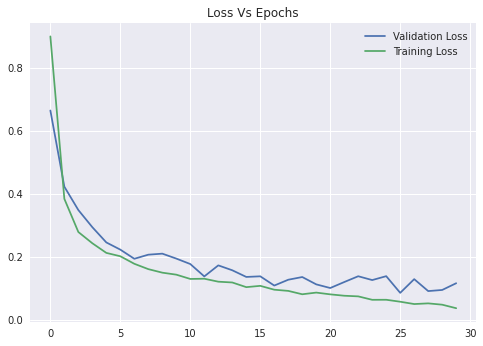

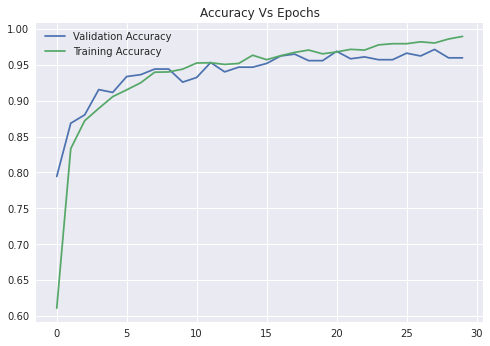

In [11]:
plt.style.use('seaborn')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss Vs Epochs')
plt.legend()
plt.show()

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy Vs Epochs')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       204
           1       1.00      0.73      0.84       251
           2       0.58      0.85      0.69       103
           3       0.98      1.00      0.99       213

    accuracy                           0.88       771
   macro avg       0.86      0.89      0.86       771
weighted avg       0.91      0.88      0.89       771

[[197   0   7   0]
 [  8 183  58   2]
 [ 13   0  88   2]
 [  1   0   0 212]]


Text(0.5, 1.0, 'Confusion Matrix Test')

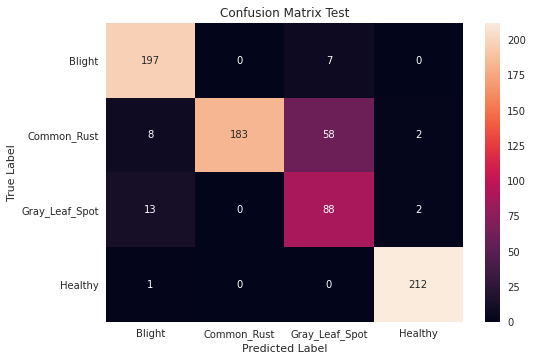

In [12]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis=1)
trueValues = np.argmax(Y_test,axis=1)
print(classification_report(trueValues,predictions))
cnf_matrix = confusion_matrix(trueValues,predictions)
print(cnf_matrix)
heatmap(cnf_matrix, annot=True, xticklabels=['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy'], 
            yticklabels=['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix Test")

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       781
           1       1.00      0.71      0.83       941
           2       0.63      0.93      0.75       410
           3       0.99      1.00      1.00       949

    accuracy                           0.90      3081
   macro avg       0.88      0.91      0.88      3081
weighted avg       0.93      0.90      0.90      3081

[[776   0   4   1]
 [ 44 671 218   8]
 [ 28   0 382   0]
 [  0   0   0 949]]


Text(50.09374999999999, 0.5, 'True Label')

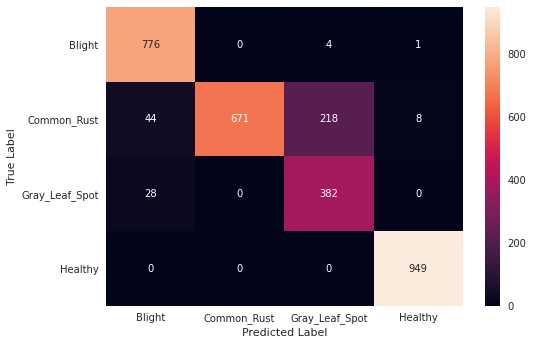

In [13]:
predictions = model.predict(X_train)
predictions = np.argmax(predictions,axis=1)
trueValues = np.argmax(Y_train,axis=1)
print(classification_report(trueValues,predictions))
cnf_matrix = confusion_matrix(trueValues,predictions)
print(cnf_matrix)
heatmap(cnf_matrix, annot=True, xticklabels=['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy'], 
            yticklabels=['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [14]:
model.save('/content/drive/MyDrive/ML Dataset Folder/Maize Leaf Disease Detection/Model/CNN_Model.h5')